In [63]:
"Workshop on DeepWalk Algorithm using Karate Club"

import networkx as nx
import matplotlib.pyplot as plt
from karateclub import DeepWalk
from karateclub import Node2Vec
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

Numer of nodes (club-members) 34


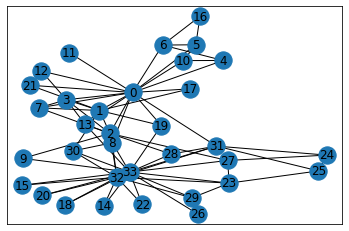

In [64]:
G = nx.karate_club_graph() # load the Zachary's karate club graph
print("Numer of nodes (club-members)", len(G.nodes))
nx.draw_networkx(G)
plt.show()

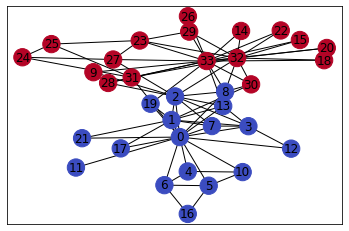

In [65]:
"plot graph with labels"
labels = []
for i in G.nodes:
    club_names = G.nodes[i]['club']
    labels.append(1 if club_names == 'Officer' else 0) # Clubs: 'Officer' or 'Mr.Hi'

layout_pos = nx.spring_layout(G)
nx.draw_networkx(G, pos = layout_pos, node_color=labels, cmap='coolwarm')
plt.show()

In [66]:
"Perform node embedding using Node2Vec"
Node2vec_model = Node2Vec(walk_number=10, walk_length=80, p=0.8, q=0.2, dimensions=124)
Node2vec_model.fit(G)
Node2vec_embedding = Node2vec_model.get_embedding()
print('Embedding array shape (nodes x features): ', Node2vec_embedding.shape)

Embedding array shape (nodes x features):  (34, 124)


In [67]:
"Perform node embedding using DeepWalk"
Deepwalk_model = DeepWalk(walk_number=10, walk_length=80, dimensions=124)
Deepwalk_model.fit(G)
embedding = Deepwalk_model.get_embedding()
print('Embedding array shape (nodes x features): ', embedding.shape)

Embedding array shape (nodes x features):  (34, 124)


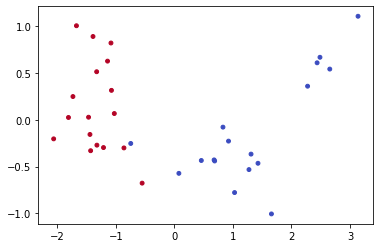

In [68]:
"Low Dimensional plot of the nodes x features"
PCA_model = sklearn.decomposition.PCA(n_components=2)
low_dimension_embedding = PCA_model.fit_transform(embedding)
#print('low dimensional embedding representation (nodesx2): ', low_dimension_embedding)
plt.scatter(low_dimension_embedding[:,0], low_dimension_embedding[:,1], c=labels, s=15, cmap='coolwarm')

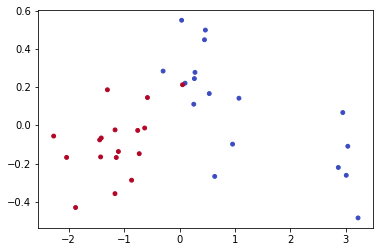

In [69]:
"Low Dimensional plot of the nodes x features"
PCA_model = sklearn.decomposition.PCA(n_components=2)
low_dimension_embedding_node2vec = PCA_model.fit_transform(Node2vec_embedding)
#print('low dimensional embedding representation (nodesx2): ', low_dimension_embedding_node2vec)
plt.scatter(low_dimension_embedding_node2vec[:,0], low_dimension_embedding_node2vec[:,1], c=labels, s=15, cmap='coolwarm')

In [70]:
"Node Classification using embedded model"
x_train, x_test, y_train, y_test = train_test_split(embedding, labels, test_size=0.3)
ML_model = LogisticRegression(random_state=0).fit(x_train, y_train)
y_predict = ML_model.predict(x_test)
ML_acc = roc_auc_score(y_test, y_predict)
print('DeepWalk AUC: ', ML_acc)

DeepWalk AUC:  0.9


In [71]:
"Node Classification using embedded model"
x_train, x_test, y_train, y_test = train_test_split(Node2vec_embedding, labels, test_size=0.3)
ML_model = LogisticRegression(random_state=0).fit(x_train, y_train)
y_predict = ML_model.predict(x_test)
ML_acc = roc_auc_score(y_test, y_predict)
print('Node2Vec AUC: ', ML_acc)

Node2Vec AUC:  1.0
